# 1. Importing Required Packages

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1.2 Loading the dataset 

In [79]:
df  = pd.read_csv('dataset\inventory_data_noisy.csv')

In [80]:
`df.head()`

SyntaxError: invalid syntax (323480923.py, line 1)

## 1. Data preprocessing

In [ ]:
df.shape

(18360, 6)

# 1.1 Handling missing values

In [ ]:
## Checking Missing Values
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

## The dataset has missing values in the following columns:

1. Dealer_ID, Product_ID, Date: No missing values (complete data).
2. Quantity, Consumption: 92 missing values each.
3. Location: 184 missing values.

## Conclusion:

You should investigate the missing values in Quantity, Consumption, and Location and decide whether to impute them or remove the rows based on the importance of these fields.

# 1.1.1 Handling Numerical values by taking the mean 

In [ ]:
df['Quantity'].fillna(df['Quantity'].mean(),inplace=True)
df['Consumption'].fillna(df['Consumption'].mean(),inplace=True)
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

## Complete data:
-> All records have data for Dealer_ID, Product_ID, Date, Quantity, and Consumption.
## Missing data:
-> There are 184 missing values in the Location column, which may need to be addressed depending on its relevance. You could impute missing locations with a default value, attempt to retrieve missing information from other sources, or remove the rows with missing location data.
## conclusion: 
-> Next steps would be to analyze whether Location is crucial for your analysis and decide on an appropriate strategy for handling the missing values.

# 1.1.2 Handling missing values in  Categorical values(Most frequent value)

In [ ]:
## Handling missing  values in Categorical values (most frequent value)
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

## Complete Data:
-> There are no missing entries for any of the columns, meaning the dataset is ready for analysis without the need for any data imputation or removal of rows.
## Clean Dataset: 
-> Since all columns are fully populated, we  can proceed with any further data analysis, modeling, or reporting without concerns about handling missing values.

# 1.2 Checking for duplicated values and handling them.

In [ ]:

df.duplicated().sum()

349

### There are around 349 duplicated values let us drop the duplicated values

In [ ]:
## drop the duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 1.3 Info on dataset 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     18011 non-null  float64
 4   Consumption  18011 non-null  float64
 5   Location     18011 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


## General Information:
1. The DataFrame contains 17,827 entries (rows) and 6 columns.

2. No missing values: Each column has 17,827 non-null values, indicating that all fields are completely filled in.

## Data Types:

1. Dealer_ID, Product_ID, Date, Location: These columns are of the object type, which typically means they hold string values.

    -> Dealer_ID and Product_ID: Likely represent identifiers or codes, and should stay as strings.

    -> Date: Even though it's an object, you may want to convert this column to datetime format for easier date-based operations.

    -> Location: This column holds categorical or string-based information like city names or regions.

2. Quantity, Consumption: These are of the float64 type, meaning they represent continuous numerical values.

    -> These columns likely represent the amount of product available or consumed and could be used for numerical analysis, such as calculating 
    totals, averages, etc.

## Memory Usage:

    -> The dataset consumes about 974.9 KB of memory, which is relatively small and manageable for further processing or analysis.

## 1.4 Checking for unique values 

In [ ]:
df.nunique()

Dealer_ID      10
Product_ID     20
Date           90
Quantity       92
Consumption    17
Location        3
dtype: int64

#### Insights
1. Dealer and Product Analysis: With 10 unique dealers and 20 unique products, you can explore dealer-specific or product-specific performance.

2. Date Variability: The 90 unique dates could represent daily or periodic data, allowing you to conduct time series analysis or trend studies.

3. Quantity vs. Consumption: The wider range of unique quantities compared to consumption suggests that quantity data is more varied. Consumption might be following more consistent patterns, which can be further analyzed.

4. Limited Geographic Spread: Since there are only 3 locations, geographic analysis is limited. You can compare metrics across these few locations but won't be able to generalize for a larger region.

## 1.5 Summary statistics

In [ ]:
df.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.231732,12.952437
std,71.490048,13.394357
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


## Quantity 
-> Has a much wider range (from 10 to 990) compared to Consumption (from 5 to 190), with a higher standard deviation indicating more variability in how much of the product is being ordered.

## The mean and median
-> For both columns are quite close, especially for Consumption, which suggests that the data is not heavily skewed, though the max values in both cases indicate the presence of potential outliers or exceptional cases.

## There is significant variability
->  In the data, especially for Quantity, which may require handling of outliers if you plan to use this data for modeling or further analysis.

## 1.6 Checking for outliers

Text(0.5, 1.0, 'Distribution of Consumption')

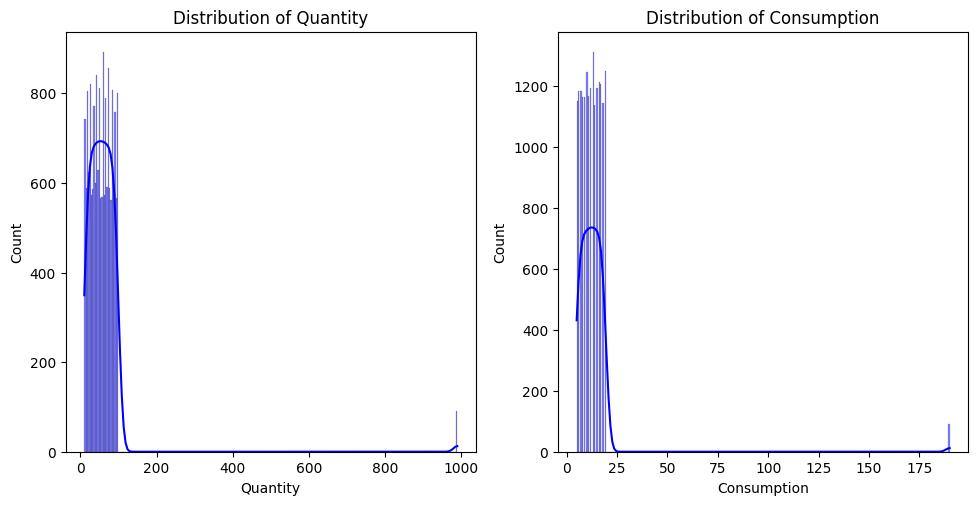

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

## Inventory Imbalance: 
-> The majority of items have low quantity and consumption, but a few have exceptionally high stock.

## Low Consumption Rate:
-> Since most consumption values are very small, this further confirms underutilization of available stock.

## Presence of Outliers:
-> These extreme values might need further investigation to understand why they exist.

Text(0.5, 1.0, 'Boxplot of Consumption')

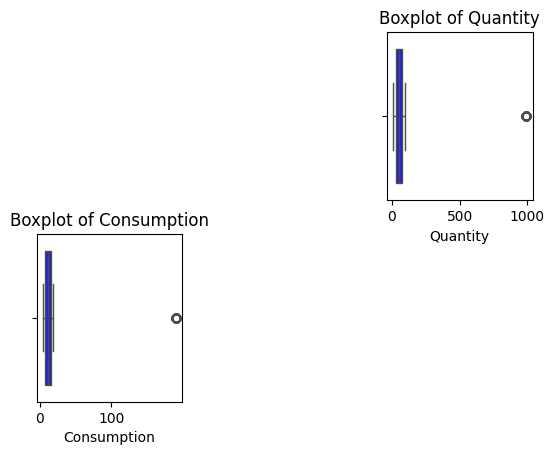

In [ ]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

## Presence of Outliers:

1. Both Quantity and Consumption have outliers (points beyond the whiskers).
2. This suggests that some products have significantly higher stock or usage than the majority.

## Skewed Distributions:

1. Both plots show a concentration of values towards the lower range with a few extreme values pulling the distribution.
2. This confirms a right-skewed distribution, as seen in the histograms.

## Narrow Interquartile Range (IQR):

1. The box (middle 50% of data) is quite compressed, showing that most products have similar stock and consumption levels.
2. A few high values create long whiskers and outliers.

## Significant Gap Between Typical Values and Outliers:

1. The majority of quantity and consumption values are quite low.
2. However, a few products have extreme stock levels and consumption rates.

## 1.6.1 Handling ouliers using IQR(Inter Quartile Range)

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)




## 1.6.2  Checking if the outliers are removed successfully using histogram and boxplot

Text(0.5, 1.0, 'Distribution of Consumption')

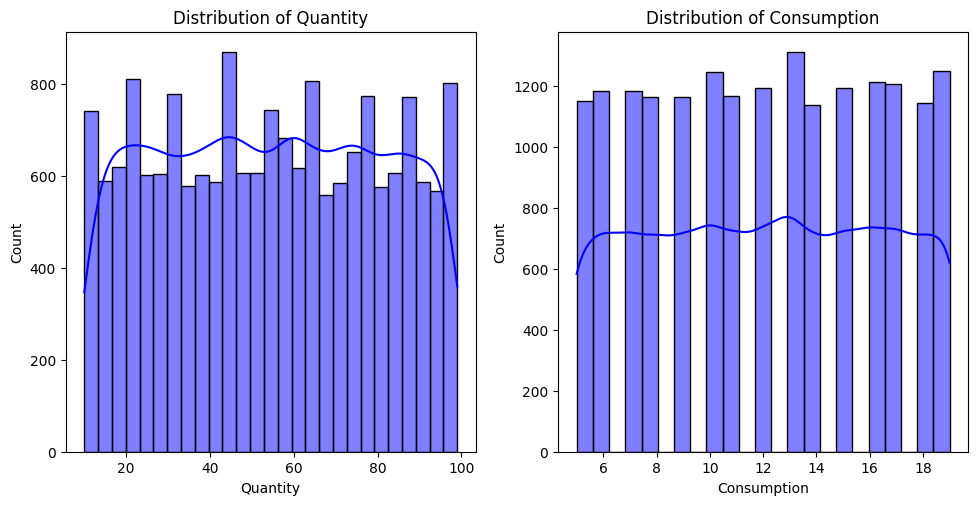

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

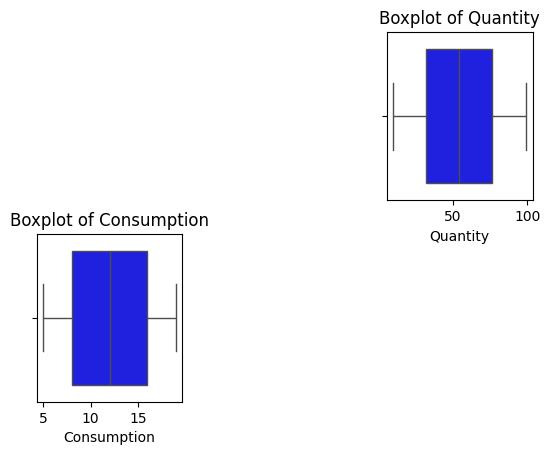

In [ ]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

## 1.7 Categorical values present in the dataset

In [ ]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


## 1.7.1  Defining Numerical and categorical values

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 4 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location']


## 1.7.2  Adding Consumption level column and Quantity consumption ratios

In [ ]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [ ]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

### we've added two columns to your dataset to aid in classification:

Consumption_Level: A categorical column that classifies Consumption into three levels: "Low", "Medium", and "High", based on quantiles.

## This classification splits the Consumption values into three groups:

1. Low: The bottom 33% of consumption values.

2. Medium: The middle 33% of consumption values.

3. High: The top 33% of consumption values.

--> This is useful for classification tasks that focus on predicting consumption levels as discrete categories.

## Quantity_consumption_ratios: A ratio column representing the relationship between Quantity and Consumption.

1. This column provides insight into how much product is being consumed relative to the quantity ordered.

2. High ratios might indicate high efficiency (high consumption relative to order size), while low ratios may indicate excess quantities being ordered or under-utilization.

### Insights on the Classification Columns:

##  Consumption_Level:

-> Balanced Distribution: Since you used quantiles to split the data, each category ("Low", "Medium", and "High") will approximately contain an equal number of records (around one-third of the total data).

-> Use Case: This column is valuable for multiclass classification tasks, where you can train a model to predict whether consumption will fall into the "Low", "Medium", or "High" category based on other features like Dealer_ID, Product_ID, Location, and Quantity.

->Potential Analysis: You could explore which factors contribute most to different consumption levels.

-> Visualizing the distribution of other features (like Quantity) within each consumption level could uncover patterns or insights.

##  Quantity_consumption_ratios:

-> Range of Values: This ratio will vary depending on the relative values of Quantity and Consumption.

1. Ratios > 1 indicate that more quantity was ordered than consumed.

2. Ratios < 1 indicate that more consumption occurred relative to the quantity ordered, which may imply a shortage or high demand.

-> Use Case: This column can be used as a feature in regression or classification tasks to understand the relationship between how much is ordered versus how much is used.

-> It can also serve as an indicator of efficiency, helping to identify cases where consumption is much lower than the quantity ordered (waste) or much higher (demand).

## checking if the new columns are added or not 


In [ ]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


The new columns Consumption level and Quantity consumption ratios are added 

## 1.8 Exploring the project
# 1.8.1 Visualize Quantity and consumption distribution to make some conclusion.
--> Histogram and Kernel Density Estimate(KDE)

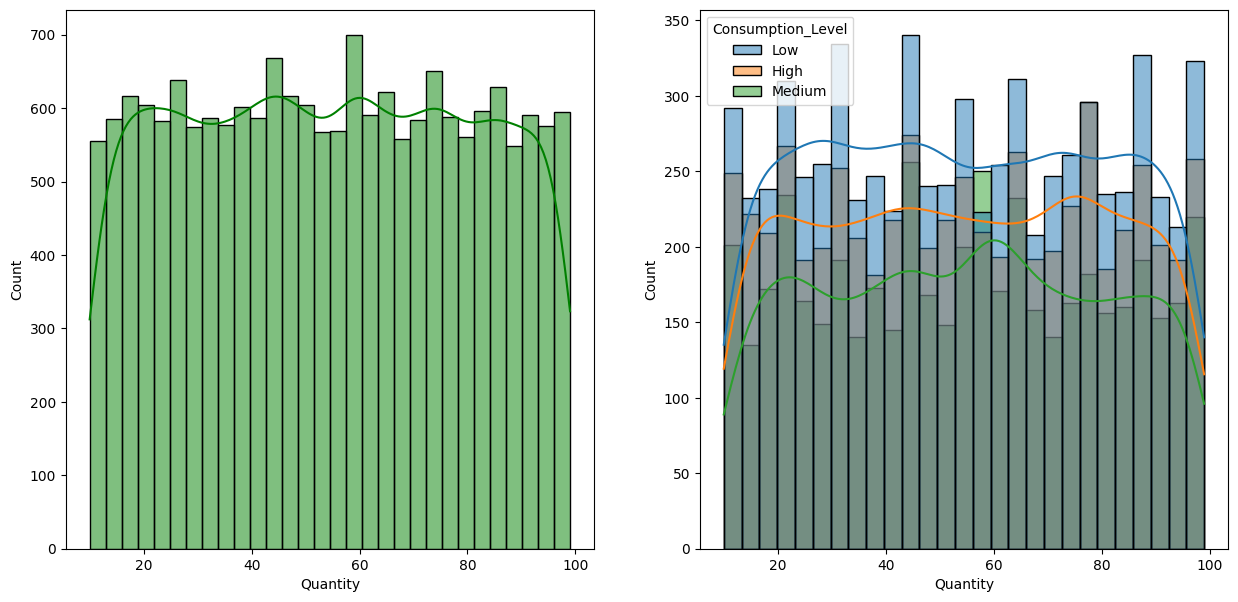

In [ ]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()


## Left Plot (Overall Quantity Distribution)
1. The Quantity values are evenly distributed across the entire range (from ~0 to 100).
2. The frequency of occurrences is relatively uniform, indicating that quantity values are not skewed toward any particular range.
3. The KDE curve is mostly flat, with minor fluctuations, reinforcing the idea of a near-uniform distribution.
4. There are no extreme peaks or dips, meaning no particular quantity range is overly dominant.

## Right Plot (Quantity Distribution by Consumption Level)
1. The Low Consumption Level (blue) has the highest frequency across most bins.
2. Medium Consumption (green) and High Consumption (orange) are distributed fairly evenly, but Medium Consumption is the least frequent.
3. The KDE curves suggest:
     1. Low Consumption is the most common category throughout.
     2. High Consumption is more concentrated in specific ranges.
     3. Medium Consumption is relatively stable but lower in frequency.
4. This indicates that most products or customers fall into the Low Consumption category, while High Consumption is less frequent.
## Key Takeaways
1. The overall distribution suggests a diverse range of quantities with no extreme bias.
2. Low Consumption dominates the dataset, meaning the model may predict this class more often.

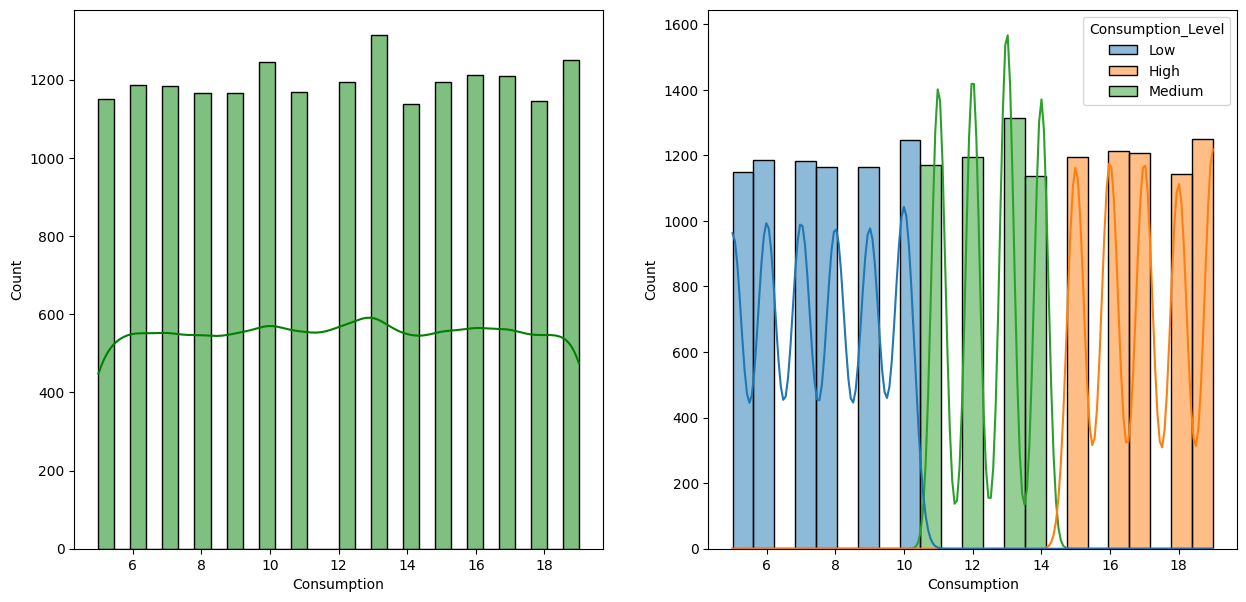

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()



## Left Plot (Overall Consumption Distribution)
1. The consumption values are spread out between 5 and 19.
2. The distribution is fairly uniform, with no significant peaks or dips.
3. The KDE curve is relatively stable, indicating that consumption values occur at almost equal frequencies.
4. There is no clear skew, meaning that all consumption levels appear to be relatively balanced.

## Right Plot (Consumption Distribution by Consumption Level)
1. The data is segmented into three categories: Low, Medium, and High Consumption Levels.
2. Low Consumption (blue) is dominant in the 5 to 10 range.
3. Medium Consumption (green) is concentrated between 11 and 14.
4. High Consumption (orange) starts around 15 and goes up to 19.
5. Each consumption level has a well-defined range with minimal overlap, meaning the categories are distinct.
6. The KDE curves indicate some oscillations in frequency, especially for Low and High consumption levels.

## Key Takeaways
1. The dataset has clear separation between Low, Medium, and High consumption levels.
2. Most data points in the Low category are clustered around 5-10, while High consumption is concentrated in the upper range (15-19).
3. There might be a potential threshold effect, where consumption values naturally fall into these three groups.

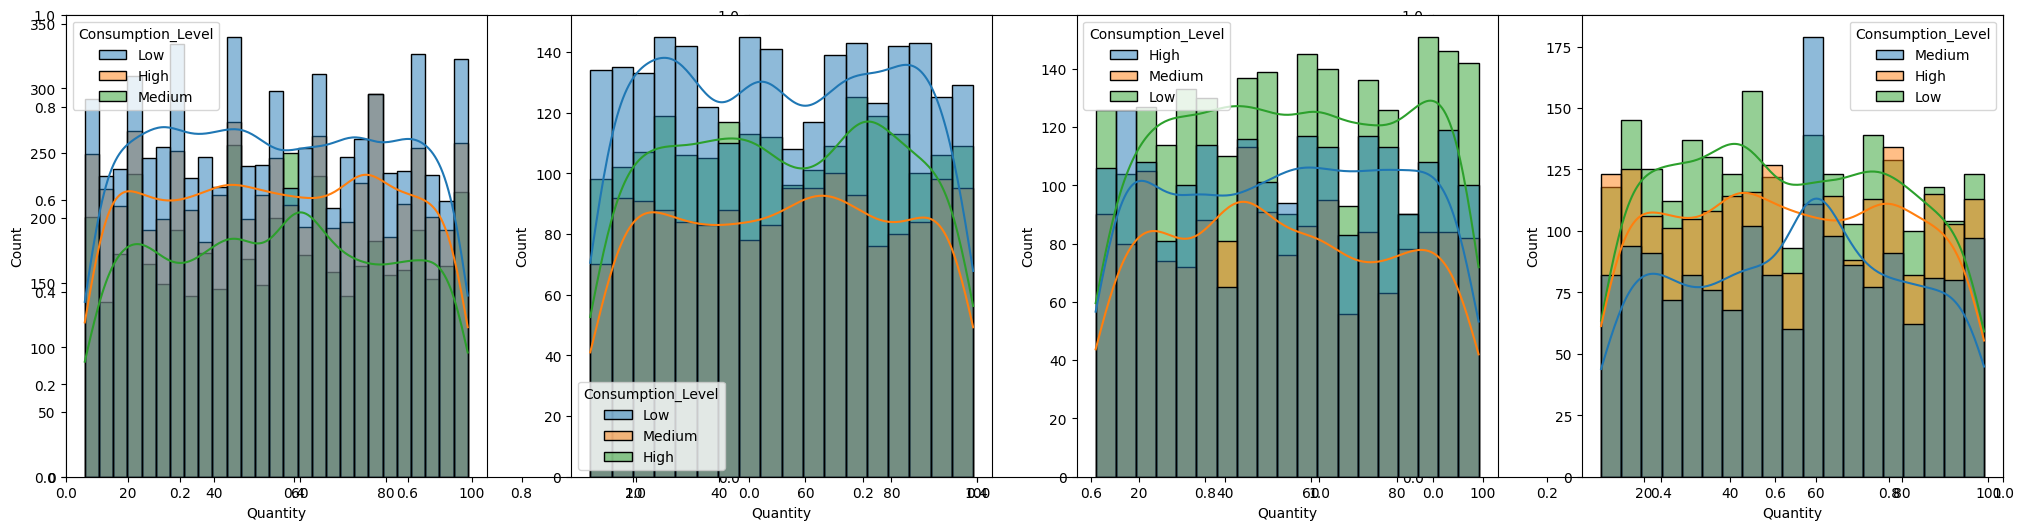

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

## Insights on above plots

### Balanced Distribution Across Quantity:

1. The Quantity values seem to be fairly evenly distributed across the three consumption levels.
2. There are no extreme skews or clear separations among the classes.

### Consumption Levels Overlap:

1. The three consumption categories (Low, Medium, High) show overlapping density curves.
2. This suggests that Quantity alone might not be a strong differentiator for Consumption_Level.

### Possible Trends in KDE Curves:

1. The Low Consumption (blue line) appears more frequent at lower quantity values.
2. The Medium Consumption (orange line) is spread across the middle.
3. The High Consumption (green line) has peaks toward the higher quantity values.

## 1.8.2 Multivariate analysis using pieplot

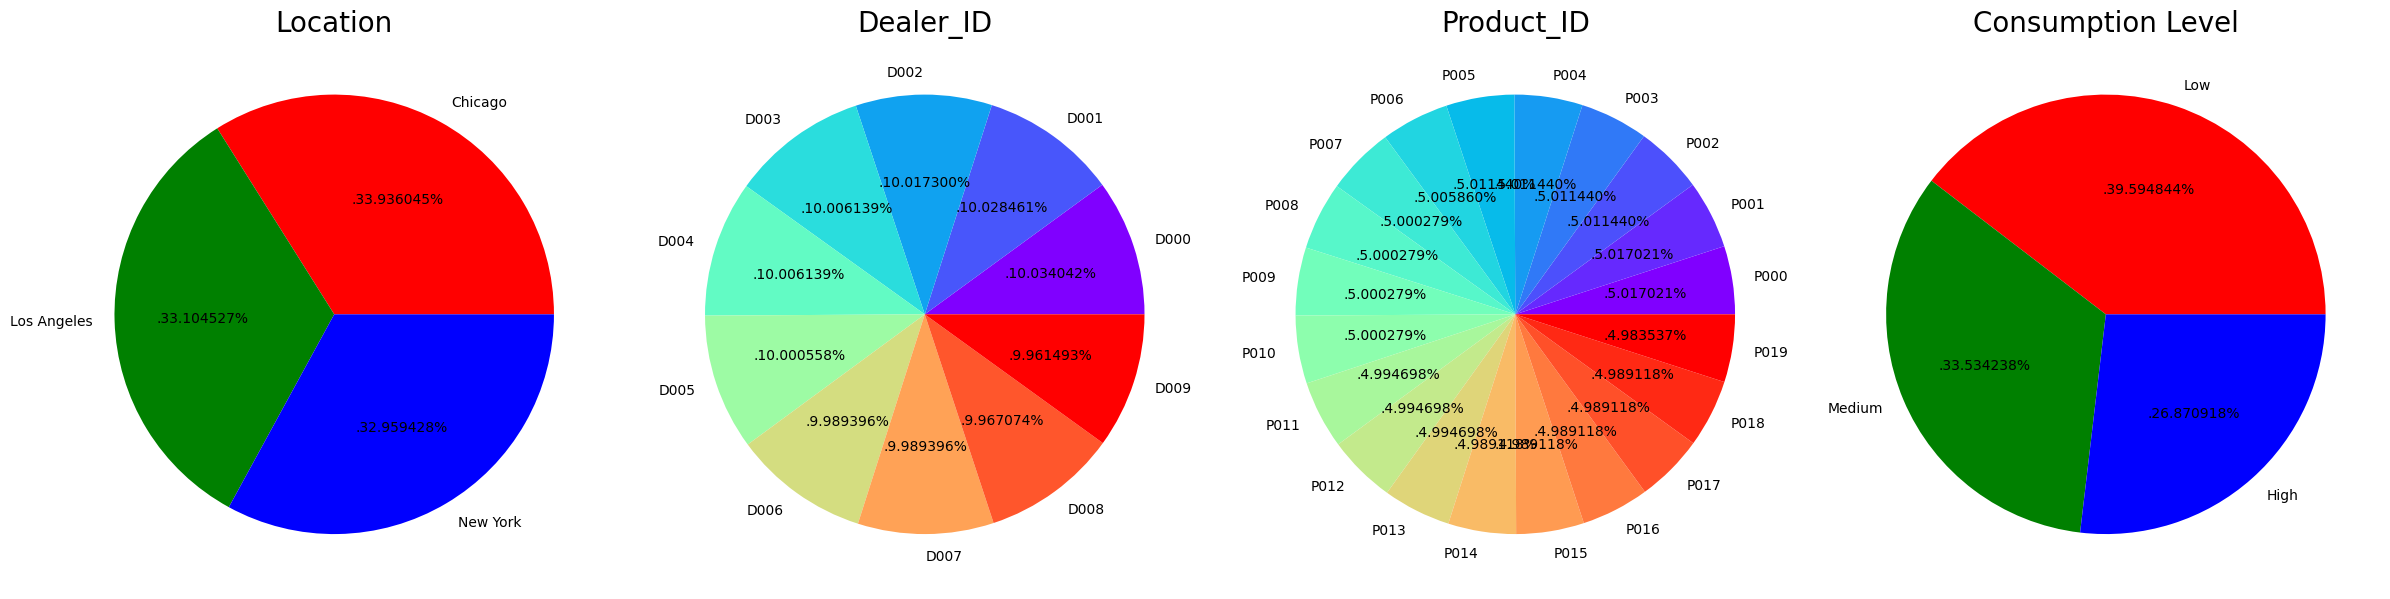

In [ ]:
## Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Location Distribution:
    The data is almost evenly split among the three cities:
    1. Chicago (~33.6%)
    2. Los Angeles (~33.3%)
    3. New York (~33.1%)
    4. This suggests that sales or consumption data is well-balanced across locations, meaning location alone may not be a strong predictor of consumption behavior.
### Dealer_ID Distribution:
    1. All 10 dealers have nearly equal representation (~10%) in the dataset.
    2. This indicates that no single dealer dominates the sales, making the dataset more diverse and preventing dealer bias.
###  Product_ID Distribution:
    1. The distribution of products is almost uniform, with each product making up about 5% of the dataset.
    2. There is no extreme dominance of a single product, which suggests that different products contribute evenly to sales/consumption.
### Consumption Level Distribution:
    1. Low Consumption is the largest category (~39.8%).
    2. Medium Consumption makes up about 33.7%.
    3. High Consumption is the smallest group at 26.5%.
    The imbalance in consumption levels suggests that most products or locations tend to fall into the low-to-medium consumption range, while high consumption is less common

## 1.8.3 Feature Wise Visualization

#### 1.8.3.1 LOCATION COLUMN

### UNIVARIATE ANALYSIS ON LOCATION COLUMN

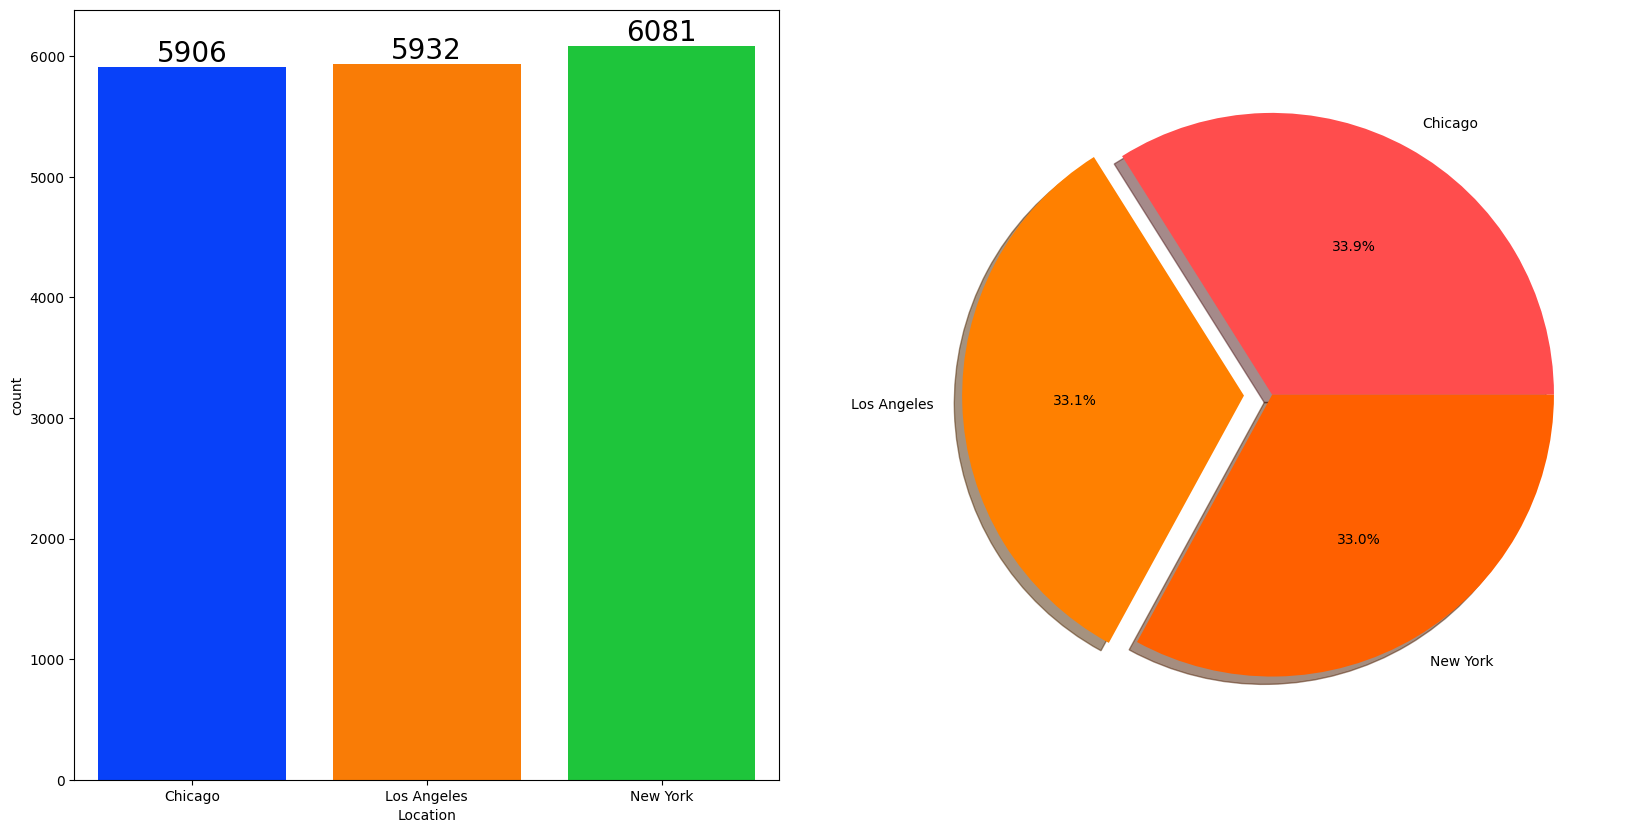

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

## Insights from the Above Plot:
#### Bar Chart (Left Plot):

1. This represents the count of some category (possibly transactions, sales, or inventory) across three locations: Chicago, Los Angeles, and New York.

2. New York has the highest count (6081), followed by Los Angeles (5932), and Chicago (5906).

3. The differences among the locations are small, indicating a fairly even distribution.

#### Pie Chart (Right Plot):

1. This shows the percentage contribution of each location to the total count.

2. Chicago (33.9%) has the highest share, while Los Angeles (33.1%) and New York (33.0%) are nearly equal.

3. The Los Angeles slice is slightly exploded, possibly to highlight its contribution.

#### Key Takeaways:

1. The distribution of counts across the three locations is almost equal, with no significant outliers.

2. This indicates a balanced distribution of resources/sales/inventory across the locations.

3. If this represents sales data, it suggests all three cities contribute nearly equally to overall performance.

#### BIVARIATE ANALYSIS ( Is Location has any impact on Consumption ? )

In [ ]:
location_group = df.groupby('Location')
location_group

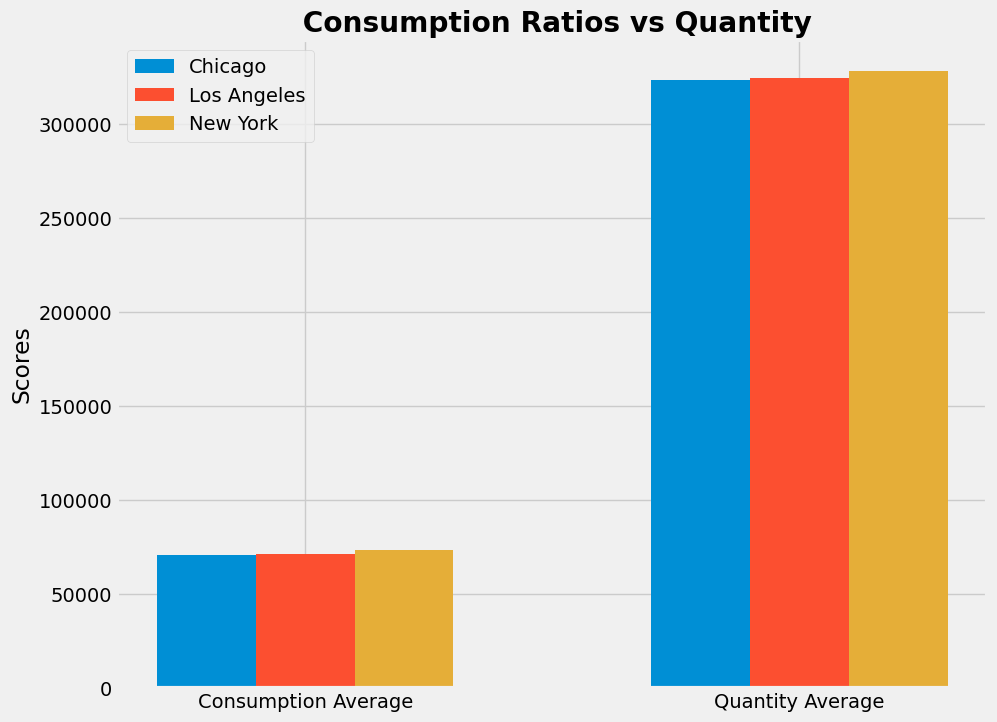

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by 'Location' and aggregating using the sum of the relevant columns
location_group = df.groupby('Location').sum()
# Extracting the required data from the aggregated DataFrame
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]

# Plot
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

# Plot the bars with proper offsets for each city
plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

# Set the x-axis labels and the chart's title
plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

# Show legend and plot
plt.legend()
plt.show()


#### The bar chart provides a comparison of Consumption Average and Quantity Average across three cities: Chicago, Los Angeles, and New York.

## Key Insights:
#### Higher Quantity Average:

1. The Quantity Average is significantly higher than the Consumption Average for all three cities.
2. This suggests that while consumption values are relatively low, the total quantity available or used is much larger.

#### Similar Trends Across Cities:

1. All three cities (Chicago, Los Angeles, New York) show very similar values for both metrics.
2. There is no major disparity between them, indicating uniform consumption and quantity patterns.

#### Slight Variation in Consumption Average:

1. New York has the highest Consumption Average, followed closely by Los Angeles and Chicago.
2. However, the differences are minimal, meaning that consumption per unit (or per capita) is fairly consistent.

#### Implication of the Trends:

1. The high quantity average might indicate a large supply base or distribution network.
2. The relatively lower consumption average suggests that not all available quantity is being consumed.

### 1.8.3.2 DEALER COLUMN
#### Univariate analysis for dealers

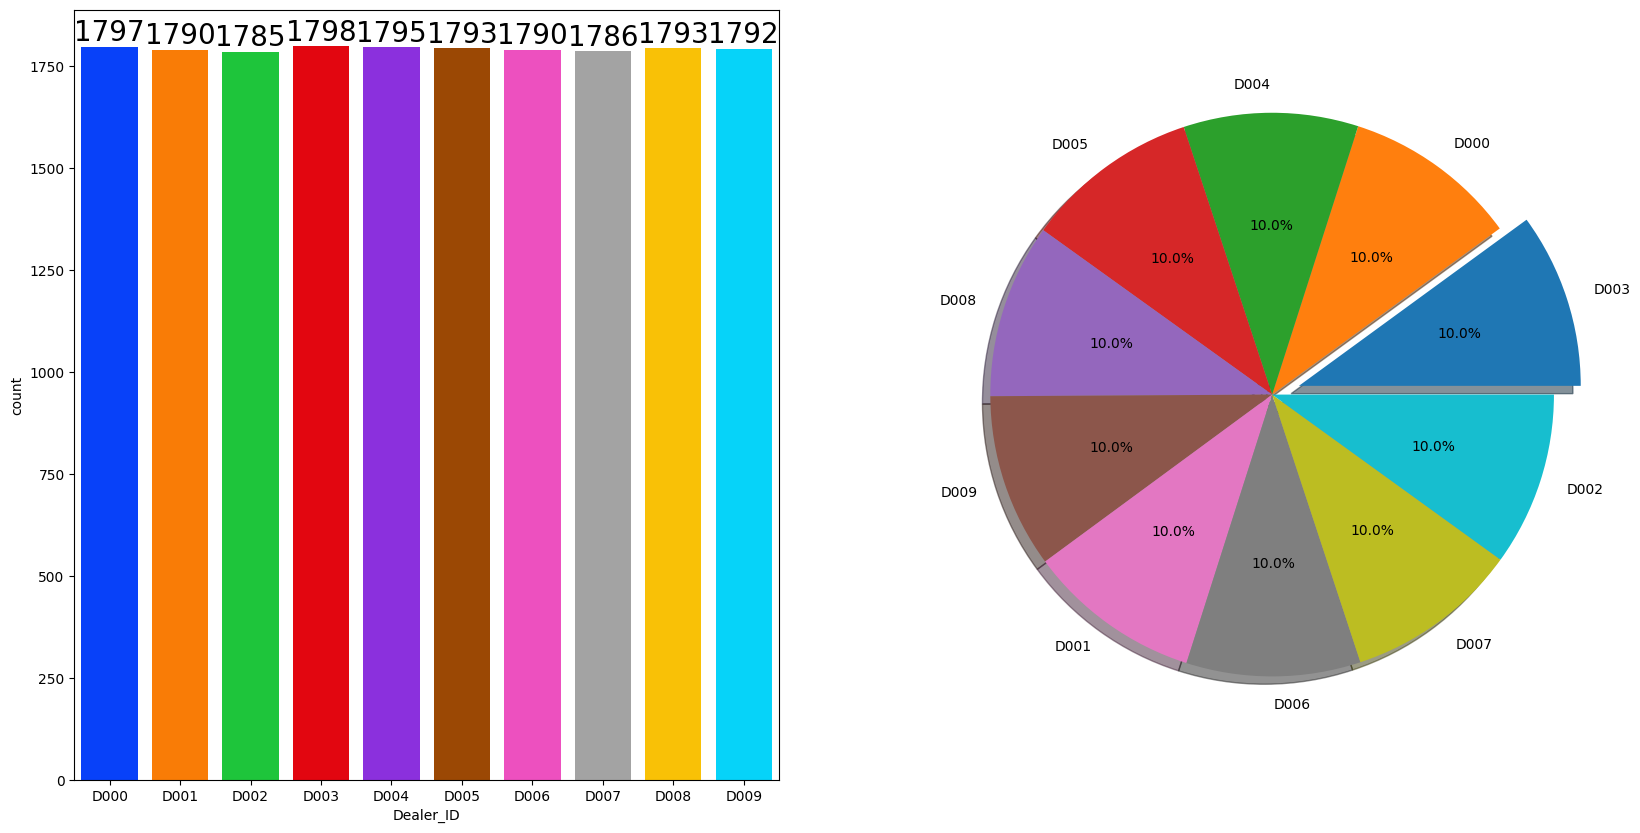

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

### Insights on the Above Plot
### The image contains two visualizations:

#### Left Plot (Bar Chart - Dealer ID vs. Count)
#### Right Plot (Pie Chart - Dealer ID Proportion)
1. Bar Chart (Left)
    -> This chart represents the count of occurrences for each Dealer ID (D000 to D009).
    -> The counts are almost equal across all dealers, ranging around 1780 to 1792.
    -> There is no significant variation, meaning all dealers have approximately the same level of activity.
    -> This suggests a well-distributed dataset where each dealer has nearly identical transaction or sales counts.
2. Pie Chart (Right)
    -> This pie chart confirms the equal distribution seen in the bar chart.
    -> Each dealer's share is almost 10%, which aligns with having 10 dealers with nearly equal counts.
    -> The slice labeled D003 is slightly larger (10.1%) and is also "exploded" for emphasis.
    -> Since the variations are minimal, no single dealer dominates the distribution.
#### Key Takeaways
    -> Uniform distribution: All dealers contribute almost equally to the dataset.
    -> Balanced dataset: No major outliers or significant disparities.
    -> D003 Slightly Higher: Though marginal, it has a slightly higher count than others.

### BIVARIATE ANALYSIS ( Is Dealer  has any impact on consumption ? )

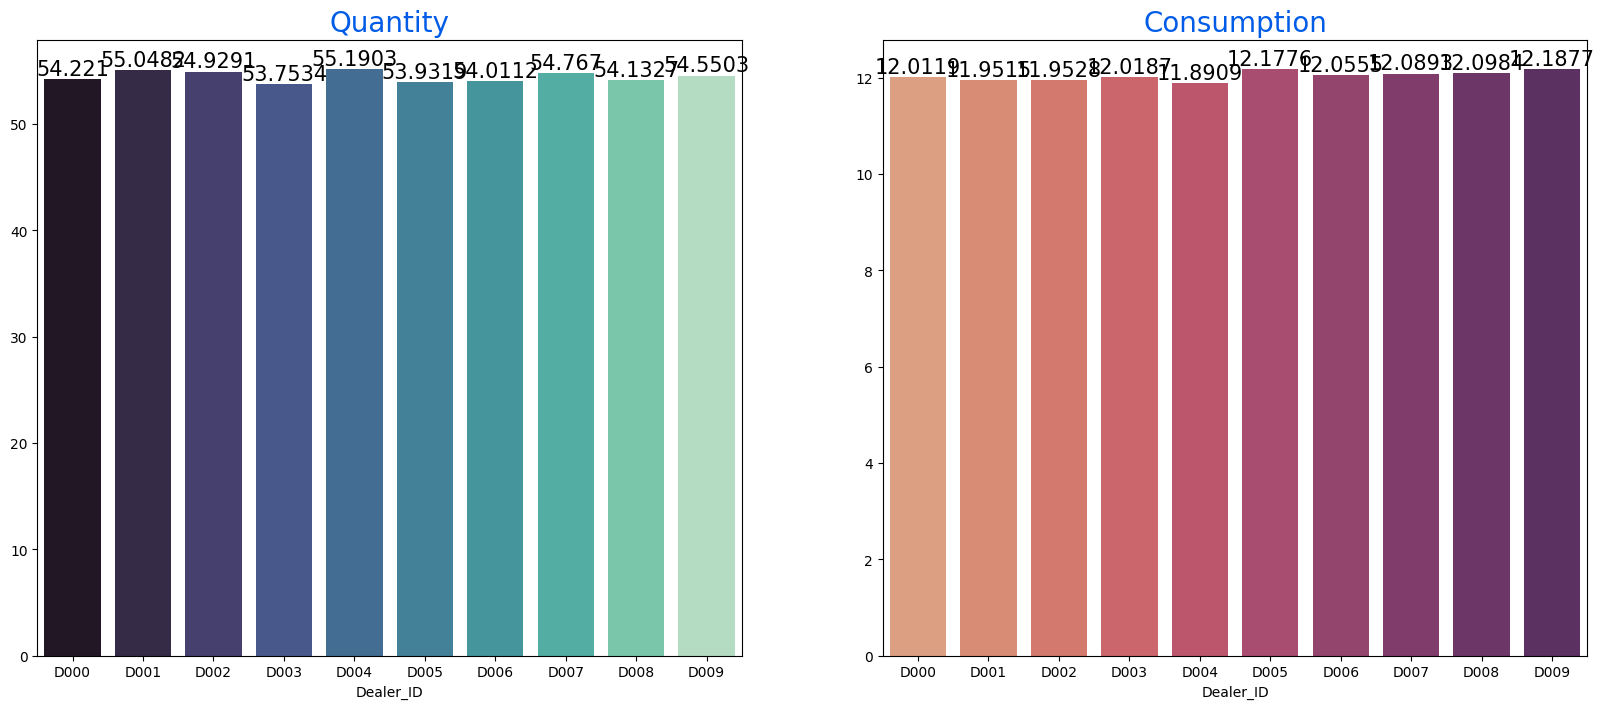

In [ ]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


### Insights on the Above Plot
### The image contains two bar charts:

### Left Chart -Quantity per Dealer
### Right Chart -Consumption per Dealer
1. Left Chart (Quantity)
    -> Represents the quantity of items associated with each Dealer ID (D000 to D009).
    -> The values are relatively close, with the range between 53.73 to 55.15.
    -> Dealer D004 has the highest quantity (55.15), while D003 has the lowest (53.73).
    -> The variation is minimal, indicating that all dealers handle almost the same quantity.
2. Right Chart (Consumption)
    -> Represents consumption per dealer.
    -> The values are again very close, ranging from 11.88 to 12.18.
    -> Dealer D009 has the highest consumption (12.18), while D005 has the lowest (11.88).
    -> The variation is very small, meaning all dealers have a nearly equal consumption rate.
### Key Takeaways
    -> Balanced Distribution: Both quantity and consumption are uniformly distributed across all dealers.
    -> No Major Outliers: The differences are minimal, meaning all dealers contribute equally to the dataset.
    -> D004 leads in Quantity, while D009 leads in Consumption, but the differences are not significant

### 1.8.3.3 PRODUCT COLUMN

### UNIVARIATE ANALYSIS ( What is the most product most used? )

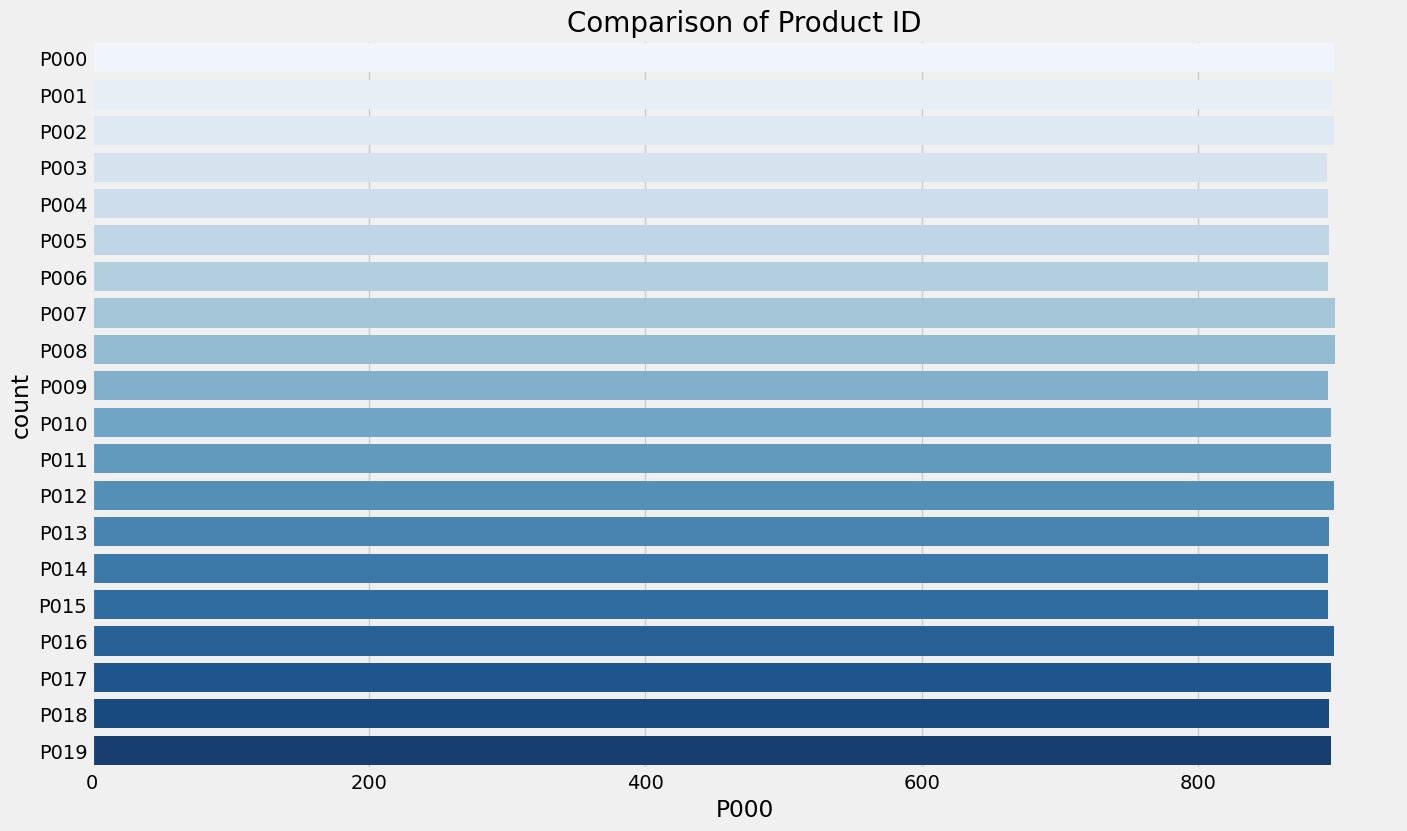

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

### Insights on the Above Plot
#### The image is a horizontal bar chart visualizing the count of different Product IDs (P000 to P019).

### Observations

### Gradient-Based Distribution:

1. The chart uses a dark-to-light gradient to represent the count.
2. P000 has the lowest count, while P019 has the highest count.
3. The values increase progressively from P000 to P019.

### Uniform Growth:

1. The counts seem to increase in a nearly linear fashion.
2. No major spikes or dips, suggesting a consistent trend.

### Top vs. Bottom Products:

1. P019, P018, and P017 have the highest counts.
2. P000, P001, and P002 have the lowest counts.
3. This might indicate that newer or more popular products have higher demand.

### Key Takeaways
1. Steady Demand Increase: Product counts increase systematically from P000 to P019, hinting at a possible product lifecycle trend.
2. Even Distribution: No major fluctuations indicate a controlled distribution process.
3. Market Trend? The higher count for later product IDs suggests they could be newer, better-performing, or more in demand.

### BIVARIATE ANALYSIS ( Is product id  has any impact on consumption ? )

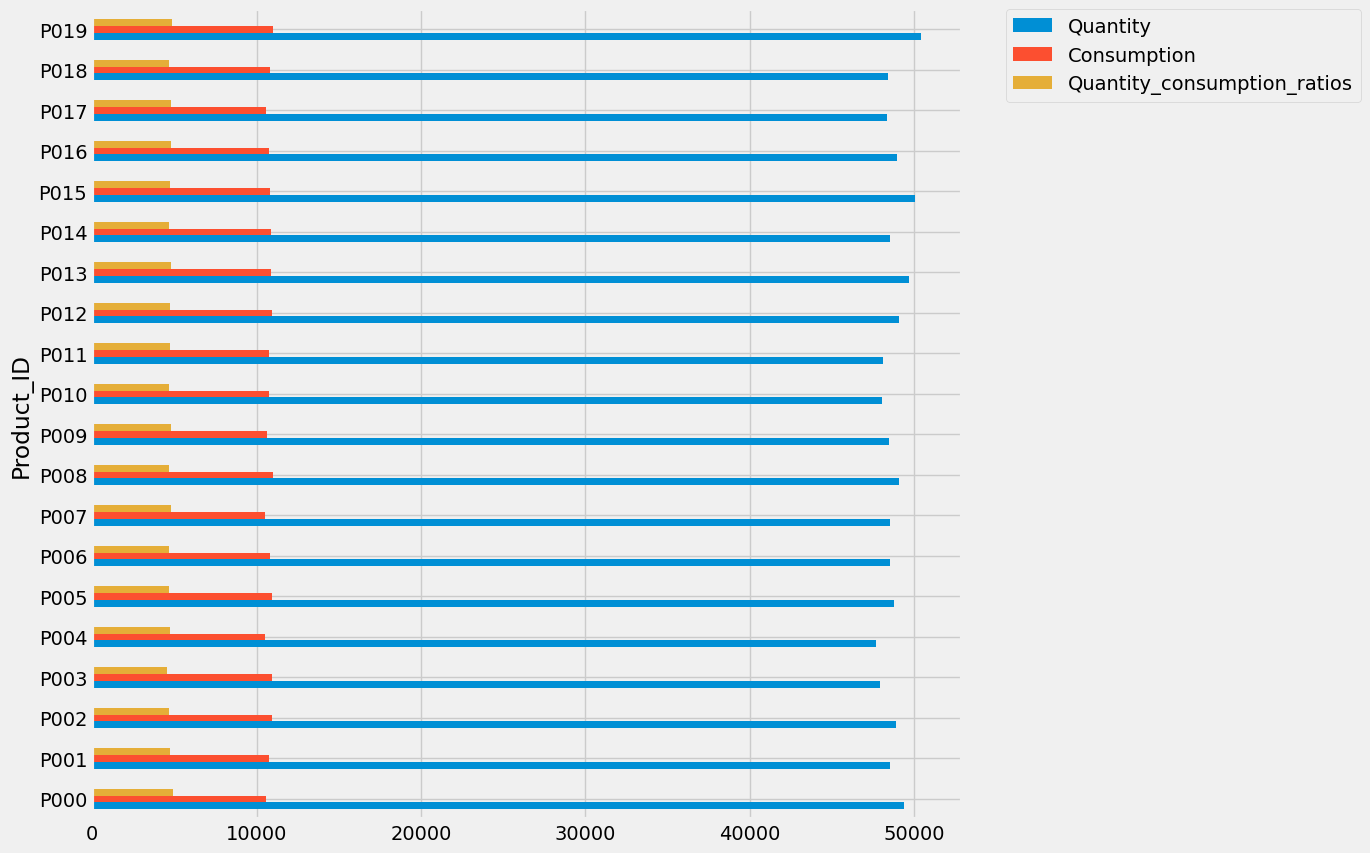

In [ ]:
df.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights on the Above Plot
### This horizontal bar chart compares three key metrics for each Product ID (P000 to P019):

### Quantity (Blue)
1. Consumption (Red)
2. Quantity-to-Consumption Ratio (Yellow)
3. Observations

### Quantity is significantly higher than Consumption:

1. The blue bars (Quantity) dominate the chart, meaning more products are available than consumed.
2. This might indicate overproduction, stockpiling, or lower demand for certain products.

### Consumption is much lower:
1. The red bars (Consumption) are relatively short, suggesting only a small portion of the available quantity is actually used.
2. This pattern is consistent across all products.

### Quantity-to-Consumption Ratio (Yellow) is minimal:

1. The yellow bars are very short, meaning the ratio is low.
2. This means a large gap exists between production (or stock) and actual usage.
3. High ratios could indicate wastage, inefficiency, or poor demand forecasting.

### Consistent Trends Across Products:

1. The same trend is observed across all Product IDs.
2. No significant outliers, meaning the imbalance is a systematic issue rather than a product-specific one.

### Key Takeaways
✔ Potential Overstocking: Since Quantity >> Consumption, there could be excess inventory.
✔ Inefficiency in Demand Planning: A low consumption rate suggests demand is lower than expected.
✔ Opportunity to Optimize Production & Distribution: Reducing quantity or boosting consumption strategies (e.g., marketing, promotions) could help balance supply and demand.